In [3]:
import pandas as pd
import re
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import matplotlib.gridspec as gridspec
import scipy
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from datetime import datetime, timedelta
from itertools import repeat
import random
import scipy.stats as stats

In [4]:
df= pd.read_excel('mastertable_sCoVs_180522_clean.xlsx')
df

,study_id,person_id,Dag 0,6 maanden huisbezoek,12m_date,Vaccin type,Vaccinatie datum 1,Vaccinatie datum 2,<1 w voor vacc1,<1 w voor vacc2,...,prevac2_HKU1_S_Trimer,prevac2_OC43_S_Trimer,prevac2_NL63_S_Trimer,prevac2_SARS2_S_Trimer,6wpostvac_samplenr,6wpostvac_229E_S_Trimer,6wpostvac_HKU1_S_Trimer,6wpostvac_OC43_S_Trimer,6wpostvac_NL63_S_Trimer,6wpostvac_SARS2_S_Trimer
0,S2V-001-co,619013,2020-10-05,2021-04-09,2021-10-08 00:00:00,NaN,2021-02-18 00:00:00,nvt,nvt,nvt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S2V-001-pa,619011,2020-10-05,2021-04-09,2021-10-08 00:00:00,NaN,2021-04-12 00:00:00,2021-06-26 00:00:00,nvt,2021-06-25 00:00:00,...,264.132132,950.453153,244.992823,54.996013,6.190115e+09,527.296671,333.527081,1048.422962,223.604416,1322.740120
2,S2K-011-co,619024,2020-10-09,2021-04-12,2021-10-11 00:00:00,Pfizer,2021-07-11 00:00:00,nvt,nvt,nvt,...,NaN,NaN,NaN,NaN,6.190245e+09,332.867047,358.810545,1198.364940,297.490623,43740.000000
3,S2K-011-m1,619008,2020-10-09,2021-04-12,2021-10-11 00:00:00,Janssen,2021-04-28 00:00:00,nvt,2021-04-28 00:00:00,nvt,...,NaN,NaN,NaN,NaN,6.190085e+09,611.294156,686.953310,1437.038846,671.338248,6332.832262
4,S2V-012-co,619021,2020-10-09,2021-04-12,2021-10-13 00:00:00,Pfizer,2021-06-17 00:00:00,2021-06-24 00:00:00,2021-06-11 00:00:00,2021-07-24 00:00:00,...,209.130746,616.826594,252.507303,151.785043,6.190215e+09,457.900419,603.096297,1468.440924,452.373012,2539.015096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,S2V-097-pa,619366,2020-11-30,2021-07-15,2021-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,S2V-097-k2,619367,2020-11-30,2021-07-15,2021-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,S2V-099-co,619352,2020-12-02,2021-05-28,2021-12-09 00:00:00,Pfizer,2021-06-04 00:00:00,2021-07-14 00:00:00,2021-05-28 00:00:00,2021-07-07 00:00:00,...,617.618247,470.351709,1343.425057,4023.791388,6.193525e+09,698.831477,559.912303,414.822935,1019.171499,18538.396809
186,S2V-099-pa,619351,2020-12-02,2021-05-28,2021-12-09 00:00:00,jansen,2021-05-28 00:00:00,nvt,2021-05-28 00:00:00,nvt,...,NaN,NaN,NaN,NaN,6.193515e+09,742.613638,836.058720,834.339787,420.056679,4970.750706


In [5]:
df['6wpostvac_SARS2_S_Trimer'].notnull().count()

188

In [6]:
df=df.replace('nvt', np.NaN)
df=df.replace('geen afspraak kunnen maken', np.NaN)
df=df.replace('gaan niet vaccineren', np.NaN)
df=df.replace('nog niet gevacineerd', np.NaN)
df=df.replace('te jong', np.NaN)
df=df.rename(columns={'Dag 0':'day0', '6 maanden huisbezoek':'6m_date', 'Vaccin type': 'vaccine', 'Vaccinatie datum 1 ': 'vac1_date', 'Vaccinatie datum 2': 'vac2_date',
     '<1 w voor vacc1':'prevac1_date', '<1 w voor vacc2':'prevac2_date', '6w na vacc2':'6wpostvac2_date'})


cols = ['day0','6m_date', '12m_date', 'prevac1_date', 'prevac2_date']
df[cols] = df[cols].apply(pd.to_datetime)
df

,study_id,person_id,day0,6m_date,12m_date,vaccine,vac1_date,vac2_date,prevac1_date,prevac2_date,...,prevac2_HKU1_S_Trimer,prevac2_OC43_S_Trimer,prevac2_NL63_S_Trimer,prevac2_SARS2_S_Trimer,6wpostvac_samplenr,6wpostvac_229E_S_Trimer,6wpostvac_HKU1_S_Trimer,6wpostvac_OC43_S_Trimer,6wpostvac_NL63_S_Trimer,6wpostvac_SARS2_S_Trimer
0,S2V-001-co,619013,2020-10-05,2021-04-09,2021-10-08,NaN,2021-02-18,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S2V-001-pa,619011,2020-10-05,2021-04-09,2021-10-08,NaN,2021-04-12,2021-06-26,NaT,2021-06-25,...,264.132132,950.453153,244.992823,54.996013,6.190115e+09,527.296671,333.527081,1048.422962,223.604416,1322.740120
2,S2K-011-co,619024,2020-10-09,2021-04-12,2021-10-11,Pfizer,2021-07-11,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,6.190245e+09,332.867047,358.810545,1198.364940,297.490623,43740.000000
3,S2K-011-m1,619008,2020-10-09,2021-04-12,2021-10-11,Janssen,2021-04-28,NaT,2021-04-28,NaT,...,NaN,NaN,NaN,NaN,6.190085e+09,611.294156,686.953310,1437.038846,671.338248,6332.832262
4,S2V-012-co,619021,2020-10-09,2021-04-12,2021-10-13,Pfizer,2021-06-17,2021-06-24,2021-06-11,2021-07-24,...,209.130746,616.826594,252.507303,151.785043,6.190215e+09,457.900419,603.096297,1468.440924,452.373012,2539.015096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,S2V-097-pa,619366,2020-11-30,2021-07-15,2021-12-01,NaN,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,S2V-097-k2,619367,2020-11-30,2021-07-15,2021-12-01,NaN,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,S2V-099-co,619352,2020-12-02,2021-05-28,2021-12-09,Pfizer,2021-06-04,2021-07-14,2021-05-28,2021-07-07,...,617.618247,470.351709,1343.425057,4023.791388,6.193525e+09,698.831477,559.912303,414.822935,1019.171499,18538.396809
186,S2V-099-pa,619351,2020-12-02,2021-05-28,2021-12-09,jansen,2021-05-28,NaT,2021-05-28,NaT,...,NaN,NaN,NaN,NaN,6.193515e+09,742.613638,836.058720,834.339787,420.056679,4970.750706


In [34]:
print(list(df.columns))

['study_id', 'person_id', 'day0', '6m_date', '12m_date', 'vaccine', 'vac1_date', 'vac2_date', 'prevac1_date', 'prevac2_date', '6wpostvac2_date', 'age', 'sex', 'is_microarray_pos', 'ct_index', 'severity_day_1', 'severity_day_3', 'severity_day_5', 'severity_day_7', 'severity_day_10', 'severity_day_14', 'severity_day_21', 'severity_day_28', 'severity_day_35', 'severity_day_42', 'ct_neus', 'ct_throat', 'is_any_pos', '42d_samplenr', '42d_229E_S_Trimer', '42d_HKU1_S_Trimer', '42d_OC43_S_Trimer', '42d_NL63_S_Trimer', '42d_SARS2_S_Trimer', '6m_samplenr', '6m_229E_S_Trimer', '6m_HKU1_S_Trimer', '6m_OC43_S_Trimer', '6m_NL63_S_Trimer', '6m_SARS2_S_Trimer', '12m_samplenr', '12m_229E_S_Trimer', '12m_HKU1_S_Trimer', '12m_OC43_S_Trimer', '12m_NL63_S_Trimer', '12m_SARS2_S_Trimer', 'prevac1_samplenr', 'prevac1_229E_S_Trimer', 'prevac1_HKU1_S_Trimer', 'prevac1_OC43_S_Trimer', 'prevac1_NL63_S_Trimer', 'prevac1_SARS2_S_Trimer_y', 'prevac2_samplenr_y', 'prevac2_229E_S_Trimer', 'prevac2_HKU1_S_Trimer', 'pre

In [7]:
#indicate whether people are vaccinated or not
df['vaccinated']=df['prevac1_HKU1_S_Trimer'].isnull() & df['prevac2_HKU1_S_Trimer'].isnull()


#make column with maximum severity score
maxcolumn=[]
for i, row in df[['severity_day_1', 'severity_day_3', 'severity_day_5', 'severity_day_7', 'severity_day_10', 'severity_day_14', 'severity_day_21', 'severity_day_28', 'severity_day_35']].iterrows():
    highest=max(list(row))
    # print(row, highest)
    maxcolumn.append(highest)
df['max_severityscore']=maxcolumn
df


,study_id,person_id,day0,6m_date,12m_date,vaccine,vac1_date,vac2_date,prevac1_date,prevac2_date,...,prevac2_NL63_S_Trimer,prevac2_SARS2_S_Trimer,6wpostvac_samplenr,6wpostvac_229E_S_Trimer,6wpostvac_HKU1_S_Trimer,6wpostvac_OC43_S_Trimer,6wpostvac_NL63_S_Trimer,6wpostvac_SARS2_S_Trimer,vaccinated,max_severityscore
0,S2V-001-co,619013,2020-10-05,2021-04-09,2021-10-08,NaN,2021-02-18,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2.0
1,S2V-001-pa,619011,2020-10-05,2021-04-09,2021-10-08,NaN,2021-04-12,2021-06-26,NaT,2021-06-25,...,244.992823,54.996013,6.190115e+09,527.296671,333.527081,1048.422962,223.604416,1322.740120,False,1.0
2,S2K-011-co,619024,2020-10-09,2021-04-12,2021-10-11,Pfizer,2021-07-11,NaT,NaT,NaT,...,NaN,NaN,6.190245e+09,332.867047,358.810545,1198.364940,297.490623,43740.000000,True,2.0
3,S2K-011-m1,619008,2020-10-09,2021-04-12,2021-10-11,Janssen,2021-04-28,NaT,2021-04-28,NaT,...,NaN,NaN,6.190085e+09,611.294156,686.953310,1437.038846,671.338248,6332.832262,False,3.0
4,S2V-012-co,619021,2020-10-09,2021-04-12,2021-10-13,Pfizer,2021-06-17,2021-06-24,2021-06-11,2021-07-24,...,252.507303,151.785043,6.190215e+09,457.900419,603.096297,1468.440924,452.373012,2539.015096,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,S2V-097-pa,619366,2020-11-30,2021-07-15,2021-12-01,NaN,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,3.0
184,S2V-097-k2,619367,2020-11-30,2021-07-15,2021-12-01,NaN,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,3.0
185,S2V-099-co,619352,2020-12-02,2021-05-28,2021-12-09,Pfizer,2021-06-04,2021-07-14,2021-05-28,2021-07-07,...,1343.425057,4023.791388,6.193525e+09,698.831477,559.912303,414.822935,1019.171499,18538.396809,False,2.0
186,S2V-099-pa,619351,2020-12-02,2021-05-28,2021-12-09,jansen,2021-05-28,NaT,2021-05-28,NaT,...,NaN,NaN,6.193515e+09,742.613638,836.058720,834.339787,420.056679,4970.750706,False,2.0


In [5]:
# make the y axis with mean neg spike titers and mean pos spike titers of each of the spikes
#on 42 days - no need to take out the vaccinated people
listforY=['42d_229E_S_Trimer', '42d_HKU1_S_Trimer', '42d_OC43_S_Trimer', '42d_NL63_S_Trimer', '42d_SARS2_S_Trimer']
yneg=[]
ypos=[]

nneg=[]
npos=[]
for item in listforY:
    meantiterneg=df[str(item)][df['is_any_pos'] == 0.0].mean()
    meantiterpos=df[str(item)][df['is_any_pos'] == 1.0].mean()

    yneg.append(meantiterneg)
    ypos.append(meantiterpos)

#nr of participants per group
nneg=df[str(listforY[1])][df['is_any_pos'] == 0.0].notnull().sum()
npos=df[str(listforY[1])][df['is_any_pos'] == 1.0].notnull().sum()

print(yneg, ypos, nneg, npos)

[600.5546685931854, 136.5520252721196, 484.6631254484707, 532.4472749259613, 26.001607911304966] [739.5153164467988, 430.9595722024465, 726.3696353495577, 582.1955838636985, 869.5983043829783] 52 117


In [6]:
print(df['6m_NL63_S_Trimer'][((df['6m_date']<df['prevac1_date'])|df['6m_date'].isnull()|df['prevac1_date'].isnull()) & (df['is_any_pos'] == 1.0)].count())
print(df['6m_NL63_S_Trimer'][((df['6m_date']<df['prevac1_date'])|df['6m_date'].isnull()|df['prevac1_date'].isnull())].count())
print(df['6m_NL63_S_Trimer'][df['is_any_pos'] == 0.0].count())

84
128
43


363688.9927642392 395830.70495668775
23351.16980651521 366661.30652092537
yes
252674.17963875958 620254.8586610028
yes
221576.82638187127 218222.86203432633
13058.624243104014 1400672.648099467
yes


C:\Users\kozanlie\AppData\Local\Temp/ipykernel_11692/756631411.py:108: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, 25000)


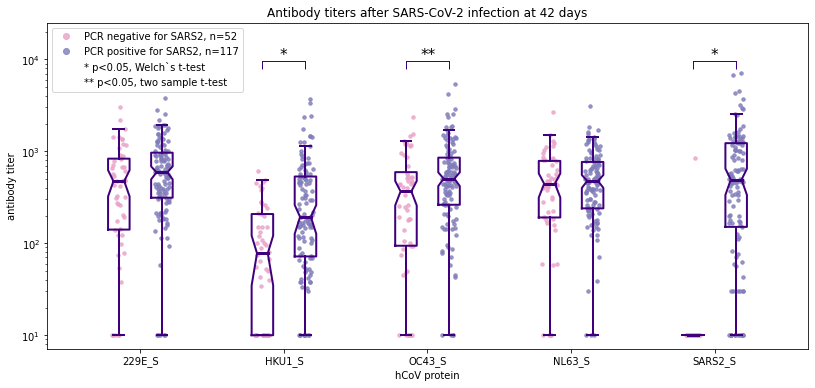

In [245]:
#first figure: barplot to compare pos and neg titers (at timepoint 42 days)
# make figure with all timepoints
fig = plt.figure(constrained_layout=False, figsize=(30, 6))
widths = [11, 11]
# heights= [5, 5]
spec = fig.add_gridspec(ncols=2, nrows=1, wspace=0.2) #width_ratios=widths

ax = fig.add_subplot(spec[0, 0])



listnames=['42d_229E_S_Trimer', '42d_HKU1_S_Trimer', '42d_OC43_S_Trimer', '42d_NL63_S_Trimer', '42d_SARS2_S_Trimer']
N=0.85
for item in listnames:
    #make sure of the right positions of the bars on the X axis
    x= df[str(item)][df['is_any_pos'] == 0.0].astype('float64').to_numpy()
    x2= df[str(item)][df['is_any_pos'] == 1.0].astype('float64').to_numpy()
    x = x[~np.isnan(x)]
    x2 = x2[~np.isnan(x2)]

    #statistics
    #check variances (ratio 4:1)        
    print(np.var(x), np.var(x2))
    # if one of two sums is under 0.25, Welchs test is needed as variance is too big
    if ((np.var(x)/ np.var(x2)) <0.25) | ((np.var(x2)/ np.var(x)) <0.25):
        #perform welchs test
        test=stats.ttest_ind(a=x, b=x2, equal_var=False)
        if test.pvalue < 0.05:
            print('yes')
            onX, onY = [N, (N+0.3)], [9500, 9500]
            plt.plot(onX, onY, marker = 3, markersize=8, linewidth=1, color='#3f007d')
            ax.annotate('*', ((N+0.12), 10000), size=15)


    else:
        #perform two sample t test
        test=stats.ttest_ind(a=x, b=x2, equal_var=True)
        if test.pvalue < 0.05:
            print('yes')
            onX, onY = [N, (N+0.3)], [9500, 9500]
            plt.plot(onX, onY, marker = 3, markersize=8, linewidth=1, color='#3f007d')
            ax.annotate('**', ((N+0.10), 10000), size=15)




    
    #determine the positions of neg and pos box
    pos=[N, N+0.3]
    c= '#3f007d'
    # colors2= ['#af8dc3', '#7fbf7b']

    ax.boxplot([x, x2], positions=pos, notch=True,  showfliers=False, patch_artist=False, boxprops=dict(linewidth=2, color=c),
    capprops=dict(linewidth=2, color=c), whiskerprops=dict(linewidth=2, color=c),medianprops=dict(linewidth=3, color=c)) # boxplot= 


    # ax.boxplot(x2, positions=2)
    ax.set_yscale('log')

    # for patch, c2 in zip(boxplot['boxes'], colors2):
    #     patch.set_facecolor(c2)


    #convert values from boxplot to get each data point in scatter
    Ys=[]
    Ys= x.tolist()+ x2.tolist()

    # pick X coordinates for each value in scatter
    list1=[]
    list2=[]
    for i in range(0,(len(x))):
        list1.append(random.uniform((N-0.05), (N+0.05)))
    for i in range(0, (len(x2))):
        list2.append(random.uniform((N+0.25), (N+0.35)))
    Xs=list1+list2



    colorlist=['#e9a3c9']*(len(x))+['#807dba']*len(x2)

    # print(len(Xs), len(Ys))

    for X, Y, color in zip(Xs, Ys, colorlist):
        ax.scatter(X, Y, alpha=0.8, c=color, s=12)
    N+=1

#nr of participants per group
nneg=df[str(listnames[1])][df['is_any_pos'] == 0.0].count()
npos=df[str(listnames[1])][df['is_any_pos'] == 1.0].count()

legend_elements = [Line2D([0], [0], marker='o', color='#e9a3c9', label='PCR negative for SARS2, n='+str(nneg), lw=0, alpha=0.8),
                   Line2D([0], [0], marker='o', color='#807dba', label='PCR positive for SARS2, n='+str(npos), lw=0, alpha=0.8),
                   Line2D([0], [0], marker='o', color='#FFFFFF', label='* p<0.05, Welch`s t-test', lw=0),
                   Line2D([0], [0], marker='o', color='#FFFFFF', label='** p<0.05, two sample t-test', lw=0)]


#labels and their positions


# Create the figure
ax.legend(handles=legend_elements, loc='upper left')
ax.set_xticks(range(1, len(listnames)+1))
ticklabels= ['229E_S', 'HKU1_S', 'OC43_S', 'NL63_S', 'SARS2_S']
ax.set_xticklabels(ticklabels)
ax.set_title('Antibody titers after SARS-CoV-2 infection at 42 days')
ax.set_ylabel('antibody titer')
ax.set_xlabel('hCoV protein')
ax.set_ylim(0, 25000)

# plt.savefig("230522_boxplot_42d_posneg_small.png", dpi=330, bbox_inches='tight')


In [1]:
#first figure: barplot to compare pos and neg titers (at timepoint 42 days)
# make figure with all timepoints
fig = plt.figure(constrained_layout=False, figsize=(30, 6))
widths = [11, 11]
# heights= [5, 5]
spec = fig.add_gridspec(ncols=2, nrows=1, wspace=0.2) #width_ratios=widths

ax = fig.add_subplot(spec[0, 0])



listnames=['6m_229E_S_Trimer', '6m_HKU1_S_Trimer', '6m_OC43_S_Trimer', '6m_NL63_S_Trimer', '6m_SARS2_S_Trimer']
N=0.85
for item in listnames:
    #make sure of the right positions of the bars on the X axis
    x= df[str(item)][((df['6m_date']<df['prevac1_date'])|df['6m_date'].isnull()|df['prevac1_date'].isnull()) & (df['is_any_pos'] == 0.0)].astype('float64').to_numpy()
    x2= df[str(item)][((df['6m_date']<df['prevac1_date'])|df['6m_date'].isnull()|df['prevac1_date'].isnull()) & (df['is_any_pos'] == 1.0)].astype('float64').to_numpy()
    x = x[~np.isnan(x)]
    x2 = x2[~np.isnan(x2)]

    #statistics
    #check variances (ratio 4:1)        
    print(np.var(x), np.var(x2))
    # if one of two sums is under 0.25, Welchs test is needed as variance is too big
    if ((np.var(x)/ np.var(x2)) <0.25) | ((np.var(x2)/ np.var(x)) <0.25):
        #perform welchs test
        test=stats.ttest_ind(a=x, b=x2, equal_var=False)
        if test.pvalue < 0.05:
            print('yes')
            onX, onY = [N, (N+0.3)], [9500, 9500]
            plt.plot(onX, onY, marker = 3, markersize=8, linewidth=1, color='#3f007d')
            ax.annotate('*', ((N+0.12), 10000), size=15)


    else:
        #perform two sample t test
        test=stats.ttest_ind(a=x, b=x2, equal_var=True)
        if test.pvalue < 0.05:
            print('yes')
            onX, onY = [N, (N+0.3)], [9500, 9500]
            plt.plot(onX, onY, marker = 3, markersize=8, linewidth=1, color='#3f007d')
            ax.annotate('**', ((N+0.10), 10000), size=15)




    
    #determine the positions of neg and pos box
    pos=[N, N+0.3]
    c= '#3f007d'
    # colors2= ['#af8dc3', '#7fbf7b']

    ax.boxplot([x, x2], positions=pos, notch=True,  showfliers=False, patch_artist=False, boxprops=dict(linewidth=2, color=c),
    capprops=dict(linewidth=2, color=c), whiskerprops=dict(linewidth=2, color=c),medianprops=dict(linewidth=3, color=c)) # boxplot= 


    # ax.boxplot(x2, positions=2)
    ax.set_yscale('log')

    # for patch, c2 in zip(boxplot['boxes'], colors2):
    #     patch.set_facecolor(c2)


    #convert values from boxplot to get each data point in scatter
    Ys=[]
    Ys= x.tolist()+ x2.tolist()

    # pick X coordinates for each value in scatter
    list1=[]
    list2=[]
    for i in range(0,(len(x))):
        list1.append(random.uniform((N-0.05), (N+0.05)))
    for i in range(0, (len(x2))):
        list2.append(random.uniform((N+0.25), (N+0.35)))
    Xs=list1+list2



    colorlist=['#e9a3c9']*(len(x))+['#807dba']*len(x2)

    # print(len(Xs), len(Ys))

    for X, Y, color in zip(Xs, Ys, colorlist):
        ax.scatter(X, Y, alpha=0.8, c=color, s=12)
    N+=1

#nr of participants per group
nneg=df[str(listnames[1])][df['is_any_pos'] == 0.0].count()
npos=df[str(listnames[1])][df['is_any_pos'] == 1.0].count()

legend_elements = [Line2D([0], [0], marker='o', color='#e9a3c9', label='PCR negative for SARS2, n='+str(nneg), lw=0, alpha=0.8),
                   Line2D([0], [0], marker='o', color='#807dba', label='PCR positive for SARS2, n='+str(npos), lw=0, alpha=0.8),
                   Line2D([0], [0], marker='o', color='#FFFFFF', label='* p<0.05, Welch`s t-test', lw=0)]


#labels and their positions


# Create the figure
ax.legend(handles=legend_elements, loc='upper left')
ax.set_xticks(range(1, len(listnames)+1))
ticklabels= ['229E_S', 'HKU1_S', 'OC43_S', 'NL63_S', 'SARS2_S']
ax.set_xticklabels(ticklabels)
ax.set_title('Antibody titers after SARS-CoV-2 infection at 6 months')
ax.set_ylabel('antibody titer')
ax.set_xlabel('hCoV protein')
ax.set_ylim(0, 25000)

# plt.savefig("230522_boxplot_6m_posneg_small.png", dpi=330, bbox_inches='tight')


NameError: name 'plt' is not defined

In [ ]:
#pre and post vaccination



#prepare a plot where we compare vaccinated people before and after vaccination
listforY1=['prevac2_229E_S_Trimer', 'prevac2_HKU1_S_Trimer', 'prevac2_OC43_S_Trimer', 'prevac2_NL63_S_Trimer', 'prevac2_SARS2_S_Trimer']
listforY2=['6wpostvac_229E_S_Trimer', '6wpostvac_HKU1_S_Trimer', '6wpostvac_OC43_S_Trimer', '6wpostvac_NL63_S_Trimer', '6wpostvac_SARS2_S_Trimer']
ypre=[]
ypost=[]

npre=[]
npost=[]
for item1, item2 in zip(listforY1, listforY2):
    #mean titer calculated by filtering on both samples available and taking the mean for each of the spike titers
    meantiterpre=df[str(item1)][(df[str(item1)].notnull() & df[str(item2)].notnull())]
    meantiterpost=df[str(item2)][(df[str(item1)].notnull() & df[str(item2)].notnull())]

    ypre.append(meantiterpre)
    ypost.append(meantiterpost)

#nr of participants per group
npre=df[str(listforY1[1])][(df[str(item1)].notnull() & df[str(item2)].notnull())].count()
npost=df[str(listforY2[1])][(df[str(item1)].notnull() & df[str(item2)].notnull())].count()

print(ypre, ypost, npre, npost)

1       499.612982
4       232.277270
8       194.540160
16      307.809943
34      232.655666
40      602.112851
49      624.104980
50      721.959454
66      523.392020
72      289.343917
86      259.767985
87      618.818489
88      472.194468
90       69.008373
133    1020.566959
160     158.301794
Name: prevac2_229E_S_Trimer, dtype: float64 1       527.296671
4       457.900419
8       201.693434
16      207.558201
34      407.826701
40      737.745555
49      492.111608
50     1021.387309
66      600.622347
72      324.022438
86      241.646210
87      799.991813
88      464.761347
90       67.720963
133     708.708325
160     318.849877
Name: 6wpostvac_229E_S_Trimer, dtype: float64
59589.98168667097 60327.204379285686
1      264.132132
4      209.130746
8      698.300827
16     415.170362
34     279.732445
40     165.665406
49     621.089113
50     672.454563
66     161.902302
72     207.193622
86     183.952798
87     536.283138
88     637.117853
90     305.103257
133    575.47

C:\Users\kozanlie\AppData\Local\Temp/ipykernel_21148/3819843941.py:120: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, 60000)


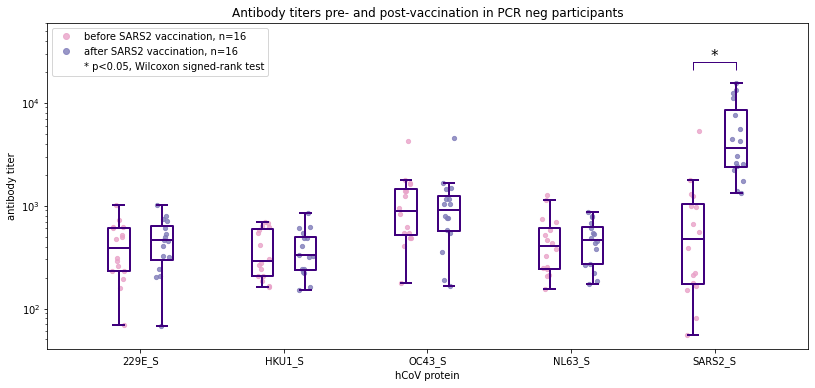

In [38]:
#figure to show before and after vaccination in PCR neg people



# make figure with all timepoints
fig = plt.figure(constrained_layout=False, figsize=(30, 6))
widths = [11, 11]
# heights= [5, 5]
spec = fig.add_gridspec(ncols=2, nrows=1, wspace=0.2) #width_ratios=widths

ax = fig.add_subplot(spec[0, 0])



# listnames=['6m_229E_S_Trimer', '6m_HKU1_S_Trimer', '6m_OC43_S_Trimer', '6m_NL63_S_Trimer', '6m_SARS2_S_Trimer']

listforY1=['prevac2_229E_S_Trimer', 'prevac2_HKU1_S_Trimer', 'prevac2_OC43_S_Trimer', 'prevac2_NL63_S_Trimer', 'prevac2_SARS2_S_Trimer']
listforY2=['6wpostvac_229E_S_Trimer', '6wpostvac_HKU1_S_Trimer', '6wpostvac_OC43_S_Trimer', '6wpostvac_NL63_S_Trimer', '6wpostvac_SARS2_S_Trimer']
ypre=[]
ypost=[]

N=0.85

for item1, item2 in zip(listforY1, listforY2):
    #mean titer calculated by filtering on both samples available and taking the mean for each of the spike titers
    x=df[str(item1)][(df[str(item1)].notnull() & df[str(item2)].notnull()) & (df['is_any_pos'] == 0.0)]
    x2=df[str(item2)][(df[str(item1)].notnull() & df[str(item2)].notnull()) & (df['is_any_pos'] == 0.0)]

    print(x, x2)
    x = x[~np.isnan(x)]
    x2 = x2[~np.isnan(x2)]


    #statistics = use paired t-test 
    #check variances (ratio 4:1)        
    print(np.var(x), np.var(x2))
    # if one of two sums is under 0.25, Welchs test is needed as variance is too big
    if ((np.var(x)/ np.var(x2)) <0.25) | ((np.var(x2)/ np.var(x)) <0.25):
        #perform wilcoxon 
        test=stats.wilcoxon(x=x, y=x2)
        if test.pvalue < 0.05:
            print('yes')
            onX, onY = [N, (N+0.3)], [25000, 25000]
            plt.plot(onX, onY, marker = 3, markersize=8, linewidth=1, color='#3f007d')
            ax.annotate('*', ((N+0.12), 26000), size=15)


    else:
        #perform paired t test
        test=stats.ttest_rel(a=x, b=x2)
        if test.pvalue < 0.05:
            print('yes')
            onX, onY = [N, (N+0.3)], [25000, 25000]
            plt.plot(onX, onY, marker = 3, markersize=8, linewidth=1, color='#3f007d')
            ax.annotate('**', ((N+0.10), 26000), size=15)




    
    #determine the positions of neg and pos box
    pos=[N, N+0.3]
    c= '#3f007d'
    # colors2= ['#af8dc3', '#7fbf7b']

    ax.boxplot([x, x2], positions=pos, notch=False,  showfliers=False, patch_artist=False, boxprops=dict(linewidth=2, color=c),
    capprops=dict(linewidth=2, color=c), whiskerprops=dict(linewidth=2, color=c),medianprops=dict(linewidth=2, color=c)) # boxplot= 


    # ax.boxplot(x2, positions=2)
    ax.set_yscale('log')

    # for patch, c2 in zip(boxplot['boxes'], colors2):
    #     patch.set_facecolor(c2)


    #convert values from boxplot to get each data point in scatter
    Ys=[]
    Ys= x.tolist()+ x2.tolist()

    # pick X coordinates for each value in scatter
    list1=[]
    list2=[]
    for i in range(0,(len(x))):
        list1.append(random.uniform((N-0.05), (N+0.05)))
    for i in range(0, (len(x2))):
        list2.append(random.uniform((N+0.25), (N+0.35)))
    Xs=list1+list2



    colorlist=['#e9a3c9']*(len(x))+['#807dba']*len(x2)

    # print(len(Xs), len(Ys))

    for X, Y, color in zip(Xs, Ys, colorlist):
        ax.scatter(X, Y, alpha=0.8, c=color, s=18)
    N+=1

#nr of participants per group
npre=df[str(listforY1[1])][(df[str(listforY1[1])].notnull() & df[listforY2[1]].notnull()) & (df['is_any_pos'] == 0.0)].count()
npost=df[str(listforY2[1])][(df[str(listforY1[1])].notnull() & df[listforY2[1]].notnull()) & (df['is_any_pos'] == 0.0)].count()

legend_elements = [Line2D([0], [0], marker='o', color='#e9a3c9', label='before SARS2 vaccination, n='+str(npre), lw=0, alpha=0.8),
                   Line2D([0], [0], marker='o', color='#807dba', label='after SARS2 vaccination, n='+str(npost), lw=0, alpha=0.8),
                   Line2D([0], [0], marker='o', color='#FFFFFF', label='* p<0.05, Wilcoxon signed-rank test', lw=0)]


#labels and their positions


# Create the figure
ax.legend(handles=legend_elements, loc='upper left')
ax.set_xticks(range(1, len(listforY1)+1))
ticklabels= ['229E_S', 'HKU1_S', 'OC43_S', 'NL63_S', 'SARS2_S']
ax.set_xticklabels(ticklabels)
ax.set_title('Antibody titers pre- and post-vaccination in PCR neg participants')
ax.set_ylabel('antibody titer')
ax.set_xlabel('hCoV protein')
ax.set_ylim(0, 60000)

# plt.savefig("230522_boxplot_prepost_neg.png", dpi=330, bbox_inches='tight')


19     3242.858768
29      402.335193
31     1545.695678
54     1049.299040
56      533.558868
58      667.763345
67      394.694063
74      777.893252
81     1107.021659
101    1771.706754
103     766.532820
120     480.099061
178     448.413500
185     815.386290
Name: prevac2_229E_S_Trimer, dtype: float64 19     1691.165587
29      212.337268
31      546.861377
54      889.474657
56      543.550380
58      981.223496
67     1083.414897
74      462.933577
81      447.482448
101    2022.611836
103     505.545062
120     256.924239
178     526.692655
185     698.831477
Name: 6wpostvac_229E_S_Trimer, dtype: float64
550116.1460035298 255853.31645834752
19      522.996241
29      254.136054
31     3444.282668
54     1362.635980
56      281.572291
58      643.340390
67       76.773977
74     1377.915663
81     1878.290034
101     538.398298
103    2078.984291
120     139.688382
178     779.421236
185     617.618247
Name: prevac2_HKU1_S_Trimer, dtype: float64 19      531.921046
29      154.

C:\Users\kozanlie\AppData\Local\Temp/ipykernel_21148/155079500.py:119: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, 60000)


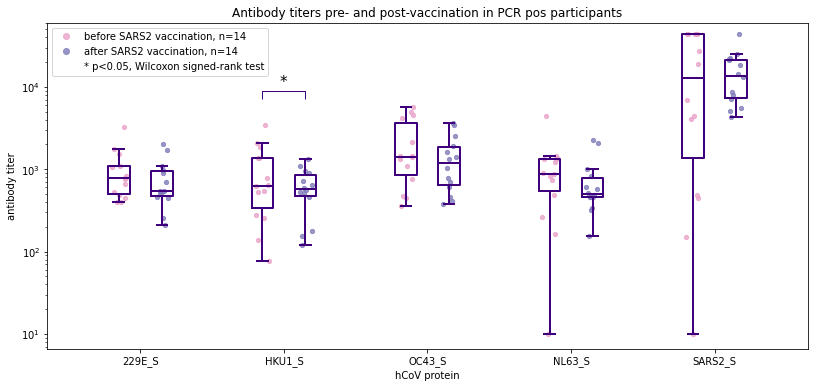

In [39]:
#figure for vaccinated people that were also tested positive



fig = plt.figure(constrained_layout=False, figsize=(30, 6))
widths = [11, 11]
# heights= [5, 5]
spec = fig.add_gridspec(ncols=2, nrows=1, wspace=0.2) #width_ratios=widths

ax = fig.add_subplot(spec[0, 0])



# listnames=['6m_229E_S_Trimer', '6m_HKU1_S_Trimer', '6m_OC43_S_Trimer', '6m_NL63_S_Trimer', '6m_SARS2_S_Trimer']

listforY1=['prevac2_229E_S_Trimer', 'prevac2_HKU1_S_Trimer', 'prevac2_OC43_S_Trimer', 'prevac2_NL63_S_Trimer', 'prevac2_SARS2_S_Trimer']
listforY2=['6wpostvac_229E_S_Trimer', '6wpostvac_HKU1_S_Trimer', '6wpostvac_OC43_S_Trimer', '6wpostvac_NL63_S_Trimer', '6wpostvac_SARS2_S_Trimer']
ypre=[]
ypost=[]

N=0.85

for item1, item2 in zip(listforY1, listforY2):
    #mean titer calculated by filtering on both samples available and taking the mean for each of the spike titers
    x=df[str(item1)][(df[str(item1)].notnull() & df[str(item2)].notnull()) & (df['is_any_pos'] == 1.0)]
    x2=df[str(item2)][(df[str(item1)].notnull() & df[str(item2)].notnull()) & (df['is_any_pos'] == 1.0)]

    print(x, x2)
    x = x[~np.isnan(x)]
    x2 = x2[~np.isnan(x2)]


    #statistics = use a paired t-test (to pair pre and post vaccination)
    #check variances (ratio 4:1)        
    print(np.var(x), np.var(x2))
    # if one of two sums is under 0.25, Welchs test is needed as variance is too big
    if ((np.var(x)/ np.var(x2)) <0.25) | ((np.var(x2)/ np.var(x)) <0.25):
        #perform welchs test
        test=stats.wilcoxon(x=x, y=x2)
        if test.pvalue < 0.05:
            print('yes')
            onX, onY = [N, (N+0.3)], [9000, 9000]
            plt.plot(onX, onY, marker = 3, markersize=8, linewidth=1, color='#3f007d')
            ax.annotate('*', ((N+0.12), 10000), size=15)


    else:
        #perform two sample t test
        test=stats.ttest_rel(a=x, b=x2)
        if test.pvalue < 0.05:
            print('yes')
            onX, onY = [N, (N+0.3)], [9000, 9000]
            plt.plot(onX, onY, marker = 3, markersize=8, linewidth=1, color='#3f007d')
            ax.annotate('**', ((N+0.10), 10000), size=15)




    
    #determine the positions of neg and pos box
    pos=[N, N+0.3]
    c= '#3f007d'
    # colors2= ['#af8dc3', '#7fbf7b']

    ax.boxplot([x, x2], positions=pos, notch=False,  showfliers=False, patch_artist=False, boxprops=dict(linewidth=2, color=c),
    capprops=dict(linewidth=2, color=c), whiskerprops=dict(linewidth=2, color=c),medianprops=dict(linewidth=2, color=c)) # boxplot= 


    # ax.boxplot(x2, positions=2)
    ax.set_yscale('log')

    # for patch, c2 in zip(boxplot['boxes'], colors2):
    #     patch.set_facecolor(c2)


    #convert values from boxplot to get each data point in scatter
    Ys=[]
    Ys= x.tolist()+ x2.tolist()

    # pick X coordinates for each value in scatter
    list1=[]
    list2=[]
    for i in range(0,(len(x))):
        list1.append(random.uniform((N-0.05), (N+0.05)))
    for i in range(0, (len(x2))):
        list2.append(random.uniform((N+0.25), (N+0.35)))
    Xs=list1+list2



    colorlist=['#e9a3c9']*(len(x))+['#807dba']*len(x2)

    # print(len(Xs), len(Ys))

    for X, Y, color in zip(Xs, Ys, colorlist):
        ax.scatter(X, Y, alpha=0.8, c=color, s=18)
    N+=1

#nr of participants per group
npre=df[str(listforY1[1])][(df[str(listforY1[1])].notnull() & df[listforY2[1]].notnull()) & (df['is_any_pos'] == 1.0)].count()
npost=df[str(listforY2[1])][(df[str(listforY1[1])].notnull() & df[listforY2[1]].notnull()) & (df['is_any_pos'] == 1.0)].count()

legend_elements = [Line2D([0], [0], marker='o', color='#e9a3c9', label='before SARS2 vaccination, n='+str(npre), lw=0, alpha=0.8),
                   Line2D([0], [0], marker='o', color='#807dba', label='after SARS2 vaccination, n='+str(npost), lw=0, alpha=0.8),
                   Line2D([0], [0], marker='o', color='#FFFFFF', label='* p<0.05, Wilcoxon signed-rank test', lw=0)]


#labels and their positions


# Create the figure
ax.legend(handles=legend_elements, loc='upper left')
ax.set_xticks(range(1, len(listforY1)+1))
ticklabels= ['229E_S', 'HKU1_S', 'OC43_S', 'NL63_S', 'SARS2_S']
ax.set_xticklabels(ticklabels)
ax.set_title('Antibody titers pre- and post-vaccination in PCR pos participants')
ax.set_ylabel('antibody titer')
ax.set_xlabel('hCoV protein')
ax.set_ylim(0, 60000)

# plt.savefig("240522_boxplot_prepost_pos.png", dpi=330, bbox_inches='tight')


In [ ]:
# show antibody trends (does this add to the message?)

# make figure with all timepoints
fig = plt.figure(constrained_layout=False, figsize=(30, 6))
widths = [11, 11]
heights= [5, 5]
spec = fig.add_gridspec(ncols=2, nrows=1, wspace=0.2) #width_ratios=widths

ax = fig.add_subplot(spec[0, 0])


In [ ]:
#new figures above
# these figures are bar figures which do not fully represent the idea


[600.5546685931854, 136.5520252721196, 484.6631254484707, 532.4472749259613, 26.001607911304966] [739.5153164467988, 430.9595722024465, 726.3696353495577, 582.1955838636985, 869.5983043829783] 52 117
[572.4765517535473, 330.7988078480504, 916.9578310291972, 711.9093315239439, 106.61904761904762] [589.0557949738702, 481.6288756461578, 821.0692669723678, 666.2589149262682, 1092.0276567902456] 42 84


C:\Users\kozanlie\AppData\Local\Temp/ipykernel_19108/2963463654.py:51: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, 1600)
C:\Users\kozanlie\AppData\Local\Temp/ipykernel_19108/2963463654.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(0, 1600)


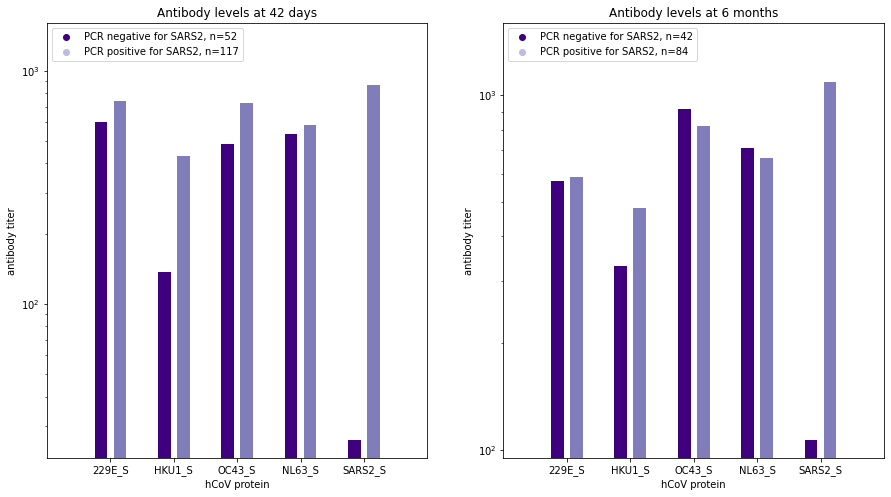

In [212]:
# make the y axis with mean neg spike titers and mean pos spike titers of each of the spikes
#on 42 days - no need to take out the vaccinated people
listforY=['42d_229E_S_Trimer', '42d_HKU1_S_Trimer', '42d_OC43_S_Trimer', '42d_NL63_S_Trimer', '42d_SARS2_S_Trimer']
yneg=[]
ypos=[]

nneg=[]
npos=[]
for item in listforY:
    meantiterneg=df[str(item)][df['is_any_pos'] == 0.0].mean()
    meantiterpos=df[str(item)][df['is_any_pos'] == 1.0].mean()

    yneg.append(meantiterneg)
    ypos.append(meantiterpos)

#nr of participants per group
nneg=df[str(listforY[1])][df['is_any_pos'] == 0.0].count()
npos=df[str(listforY[1])][df['is_any_pos'] == 1.0].count()

print(yneg, ypos, nneg, npos)



#first figure: barplot to compare pos and neg titers (at timepoint 42 days)
# make figure with all timepoints
fig = plt.figure(constrained_layout=False, figsize=(15, 8))
widths = [11, 11]
# heights= [5, 5]
spec = fig.add_gridspec(ncols=2, nrows=1, wspace=0.2) #width_ratios=widths

ax = fig.add_subplot(spec[0, 0])

#make sure of the right positions of the bars on the X axis
prex = np.array(range(len(yneg)))



x = np.subtract(prex, 0.15)
ax.bar(x,yneg, width=0.2, color='#3f007d')

x = np.subtract(prex, (-0.15))
ax.bar(x,ypos, width=0.2, color='#807dba') 

#ticklabels change
ticklabels=['229E_S', 'HKU1_S', 'OC43_S', 'NL63_S', 'SARS2_S']
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(ticklabels)

ax.set_yscale('log')
ax.set_xlim(-1, 5)
ax.set_ylim(0, 1600)

ax.set_title('Antibody levels at 42 days')
ax.set_xlabel('hCoV protein')
ax.set_ylabel('antibody titer')


legend_elements = [Line2D([0], [0], marker='o', color='#3f007d', label='PCR negative for SARS2, n='+str(nneg), lw=0),
                   Line2D([0], [0], marker='o', color='#bcbddc', label='PCR positive for SARS2, n='+str(npos), lw=0)]

# Create the figure
ax.legend(handles=legend_elements, loc='upper left')



# make the y axis with mean neg spike titers and mean pos spike titers of each of the spikes
#on 42 days - no need to take out the vaccinated people
listforY=['6m_229E_S_Trimer', '6m_HKU1_S_Trimer', '6m_OC43_S_Trimer', '6m_NL63_S_Trimer', '6m_SARS2_S_Trimer']
yneg=[]
ypos=[]

nneg=[]
npos=[]
for item in listforY:
    meantiterneg=df[str(item)][((df['6m_date']<df['prevac1_date'])|df['6m_date'].isnull()|df['prevac1_date'].isnull()) & (df['is_any_pos'] == 0.0)].mean()
    meantiterpos=df[str(item)][((df['6m_date']<df['prevac1_date'])|df['6m_date'].isnull()|df['prevac1_date'].isnull()) & (df['is_any_pos'] == 1.0)].mean()

    yneg.append(meantiterneg)
    ypos.append(meantiterpos)

#nr of participants per group
nneg=df[str(listforY[1])][((df['6m_date']<df['prevac1_date'])|df['6m_date'].isnull()|df['prevac1_date'].isnull()) & (df['is_any_pos'] == 0.0)].count()
npos=df[str(listforY[1])][((df['6m_date']<df['prevac1_date'])|df['6m_date'].isnull()|df['prevac1_date'].isnull()) & (df['is_any_pos'] == 1.0)].count()

print(yneg, ypos, nneg, npos)




#second panel of the figure

ax1 = fig.add_subplot(spec[0, 1])

#make sure of the right positions of the bars on the X axis
prex = np.array(range(len(yneg)))



x = np.subtract(prex, 0.15)
ax1.bar(x,yneg, width=0.2, color='#3f007d')

x = np.subtract(prex, (-0.15))
ax1.bar(x,ypos, width=0.2, color='#807dba') 

#ticklabels change
ticklabels=['229E_S', 'HKU1_S', 'OC43_S', 'NL63_S', 'SARS2_S']
ax1.set_xticks([0,1,2,3,4])
ax1.set_xticklabels(ticklabels)

ax1.set_yscale('log')
ax1.set_xlim(-1, 5)
ax1.set_ylim(0, 1600)

ax1.set_title('Antibody levels at 6 months')
ax1.set_xlabel('hCoV protein')
ax1.set_ylabel('antibody titer')


legend_elements = [Line2D([0], [0], marker='o', color='#3f007d', label='PCR negative for SARS2, n='+str(nneg), lw=0),
                   Line2D([0], [0], marker='o', color='#bcbddc', label='PCR positive for SARS2, n='+str(npos), lw=0)]

# Create the figure
ax1.legend(handles=legend_elements, loc='upper left')






plt.show
# plt.savefig("180522_ab_sCoV_combined_posneg.png", dpi=330, bbox_inches='tight')


In [218]:
#prepare a plot where we compare vaccinated people before and after vaccination
listforY1=['prevac2_229E_S_Trimer', 'prevac2_HKU1_S_Trimer', 'prevac2_OC43_S_Trimer', 'prevac2_NL63_S_Trimer', 'prevac2_SARS2_S_Trimer']
listforY2=['6wpostvac_229E_S_Trimer', '6wpostvac_HKU1_S_Trimer', '6wpostvac_OC43_S_Trimer', '6wpostvac_NL63_S_Trimer', '6wpostvac_SARS2_S_Trimer']
ypre=[]
ypost=[]

npre=[]
npost=[]
for item1, item2 in zip(listforY1, listforY2):
    #mean titer calculated by filtering on both samples available and taking the mean for each of the spike titers
    meantiterpre=df[str(item1)][(df[str(item1)].notnull() & df[str(item2)].notnull())].mean()
    meantiterpost=df[str(item2)][(df[str(item1)].notnull() & df[str(item2)].notnull())].mean()

    ypre.append(meantiterpre)
    ypost.append(meantiterpost)

#nr of participants per group
npre=df[str(listforY1[1])][(df[str(item1)].notnull() & df[str(item2)].notnull())].count()
npost=df[str(listforY2[1])][(df[str(item1)].notnull() & df[str(item2)].notnull())].count()

print(ypre, ypost, npre, npost)

[694.3241866918112, 672.4344986480162, 1621.0124403504283, 774.5416938665268, 9858.424937527869] [614.9630724647683, 498.24310826042216, 1263.3221816132282, 606.7806331540752, 10347.286895489093] 30 30


C:\Users\kozanlie\AppData\Local\Temp/ipykernel_19108/1725521842.py:28: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, 12000)


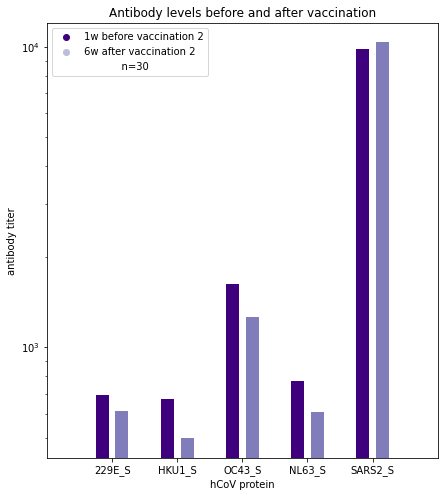

In [217]:
#first figure: barplot to compare pos and neg titers (at timepoint 42 days)
# make figure with all timepoints
fig = plt.figure(constrained_layout=False, figsize=(7, 8))
widths = [11, 11]
# heights= [5, 5]
spec = fig.add_gridspec(ncols=1, nrows=1, wspace=0.08) #width_ratios=widths

ax = fig.add_subplot(spec[0, 0])

#make sure of the right positions of the bars on the X axis
prex = np.array(range(len(yneg)))



x = np.subtract(prex, 0.15)
ax.bar(x,ypre, width=0.2, color='#3f007d')

x = np.subtract(prex, (-0.15))
ax.bar(x,ypost, width=0.2, color='#807dba') 

#ticklabels change
ticklabels=['229E_S', 'HKU1_S', 'OC43_S', 'NL63_S', 'SARS2_S']
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(ticklabels)

ax.set_yscale('log')
ax.set_xlim(-1, 5)
ax.set_ylim(0, 12000)
ax.set_title('Antibody levels before and after vaccination')
ax.set_xlabel('hCoV protein')
ax.set_ylabel('antibody titer')


legend_elements = [Line2D([0], [0], marker='o', color='#3f007d', label='1w before vaccination 2', lw=0),
                   Line2D([0], [0], marker='o', color='#bcbddc', label='6w after vaccination 2', lw=0),
                   Line2D([0], [0], marker='o', color='#FFFFFF', label='            n='+str(npost), lw=0)]

# Create the figure
ax.legend(handles=legend_elements, loc='upper left')
plt.show
# plt.savefig("180522_ab_sCoV_prepost_vaccination.png", dpi=330, bbox_inches='tight')
